# Exploratory Data Analysis of Indian Companies Registration #
![](https://clockit.io/wp-content/uploads/2016/07/all-companies.png)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

Companies play an important role in nation's growth. 

Exploration is the engine that drives innovation. Innovation drives economic growth. So let's all go exploring. -Edith Widder

We will explore Indian companies registration from 1857 to 2020. [Dataset](https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019) that we are going to use in the project is from [Kaggle](https://www.kaggle.com/). 

Data contains various information like Corporate Identification Number(CIN), Company Name, Company Status, Company Class, Company Category, Authorized Capital in INR, Paid-up Capital in INR, Date of Registration, Registered State, Registrar of Companies, Principal Business Activity, Registered Office Address and Sub Category.

There are 1.9+ million rows and 17 columns.

In this project we are going to use [Numpy](https://numpy.org/doc/stable/user/index.html), [Pandas](https://pandas.pydata.org/docs/user_guide/index.html), [Matplotlib](https://matplotlib.org/stable/index.html), [Seaborn](https://seaborn.pydata.org/tutorial.html), [Plotly](https://plotly.com/python/), [opendatasets](https://github.com/JovianML/opendatasets) libraries of Python.

Here is the outline of the project:
* Download the Data
* Data Preparation and Cleaning
* Exploratory Analysis and Visualization
* Ask & Answer Questions
* Summary
* Conclusion
* Future Work Ideas
* References

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="exploratory-data-analysis-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/singhalkshama4343/exploratory-data-analysis-project


'https://jovian.ai/singhalkshama4343/exploratory-data-analysis-project'

First install important libraries that we are going to use i.e. Numpy for numerial calculation, Pandas for handling dataframes and Matplotlib, Plotly, Seaborn for visulization. 

In [ ]:
!pip install numpy pandas==1.1.5 wordcloud jovian opendatasets matplotlib==3.1.3 seaborn plotly folium --upgrade --quiet

     |████████████████████████████████| 9.5 MB 5.4 MB/s 
     |████████████████████████████████| 13.1 MB 34.9 MB/s 
     |████████████████████████████████| 285 kB 41.5 MB/s 
     |████████████████████████████████| 15.2 MB 45.5 MB/s 


Importing libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
%matplotlib inline

## Download the Data

We will use opendatasets library for downloading the data. It is effective and easy way to download the data from kaggle.

So, first install opendatasets.

In [ ]:
!pip install opendatasets --upgrade --quiet

We have to provide the link for the data in od.download function as an argument.
It will ask for username and kaggle key that you can generate by clicking on your kaggle profile. There go to your account and click on 'Create New API Token` available in API. The fill will be downloaded as json file so upload it on the jupyter notebook.


In [ ]:
import opendatasets as od

download_url="https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019"

od.download(download_url)

Skipping, found downloaded files in "./all-indian-companies-registration-data-1900-2019" (use force=True to force download)


Now, provide the data file's path. That you can get by following the below method.
![](https://i.imgur.com/UaOEye3.png)

In [ ]:
data_filename='/content/all-indian-companies-registration-data-1900-2019/registered_companies.csv'

## Data Preparation and Cleaning ##
Before starting to analyze and visualize the data we have to look up the file, its colums and their information. We have to go through data to see if there is significant values available. 


We will use Pandas library to read the csv file.

In [ ]:
df=pd.read_csv(data_filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F01450,NIKO RESOURCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"4TH FLOOR,LANDMARKRACE COURSE",ROC DELHI,SANJAY@NIKOINDIA.COM,NaN,NaN
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,NaN,NaN,NaN,16-07-1998,Gujarat,0.0,0.0,NaN,Agriculture & allied,403 3 6 322 MAHAVIR HOUSEBUSHEER BAGH HYDERGUD...,ROC DELHI,NaN,NaN,NaN
2,F01573,ATWOOD OCEANIC PACIFIC LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Quadrant 1, Plot Number 18, 2nd FloorSuman Tow...",ROC DELHI,info@nangia.com,NaN,NaN
3,F01802,SOLVAY S A BELGIUM,NAEF,NaN,NaN,NaN,25-06-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Plot No. 3526 & 3527,GIDC Industrial Estate,",ROC DELHI,amit.kumashi@solvay.com,NaN,NaN
4,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,NaN,NaN,NaN,25-07-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,24 ATMAJYOTI NAGARELLORA PARK,ROC DELHI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992165,U51109NL2000PTC006232,SCIENTIFIC ADVANCE INSTRUMENTS & EQUIPMENTS CO...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,20000.0,51109,Wholesale and retail trade repair of motor veh...,"BEHIND TOWN COMMITTEE,MKALABARI ROAD",ROC SHILLONG,NaN,NaN,NaN
1992166,U51109NL2000PTC006233,SUNSHINE INSTRUMENTS & EQUIPMENTS COMPANY PRIV...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,200000.0,51109,Wholesale and retail trade repair of motor veh...,JAIN TEMPLE ROADDIMAPUR,ROC SHILLONG,NaN,NaN,NaN
1992167,U51109NL2000PTC006259,STERN (INDIA) PLANTATION & MARKETING PRIVATE L...,STOF,Private,Company limited by Shares,Non-govt company,25-07-2000,Nagaland,200000.0,3000.0,51109,Wholesale and retail trade repair of motor veh...,RENGMA CHURCH BUILDINGKHERMAHALDIMAPUR,ROC SHILLONG,NaN,NaN,NaN
1992168,U74950NL1998PTC005463,T.A. NGULLIE FRUIT PRODUCTS PVT LTD.,STOF,Private,Company limited by Shares,Non-govt company,09-07-1998,Nagaland,2500000.0,0.0,74950,Real estate renting and business activities,"CHUMUKEDIME,BLOCK-3, DIST.KOHIMA.",ROC SHILLONG,rks97cs@yahoo.com,NaN,NaN


To get some information about the data we will use `df.info()` function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 17 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         object 
 1   COMPANY_NAME                            object 
 2   COMPANY_STATUS                          object 
 3   COMPANY_CLASS                           object 
 4   COMPANY_CATEGORY                        object 
 5   COMPANY_SUB_CATEGORY                    object 
 6   DATE_OF_REGISTRATION                    object 
 7   REGISTERED_STATE                        object 
 8   AUTHORIZED_CAP                          float64
 9   PAIDUP_CAPITAL                          float64
 10  INDUSTRIAL_CLASS                        object 
 11  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  object 
 12  REGISTERED_OFFICE_ADDRESS               object 
 13  REGISTRAR_OF_COMPANIES                  object 
 14  EMAIL_ADDR                        

Here is some more information about the data.

1. CORPORATE_ IDENTIFICATION_NUMBER - Corporate Identification Number sometimes referred to as CIN is a unique identification number which is assigned by the ROC (Registrar of Companies) of various states under the MCA (Ministry of Corporate Affairs).

2. COMPANY_NAME - Name of the company.

3. COMPANY_STATUS - The 'Status' tell the current state of the company. Whether it is active and operating or dormant or it has been struck off and closed. There are 13 such status that a company could be carrying:
* ACTV - Active
* NAEF - Not available for e-filing
* ULQD - Under liquidation
* AMAL - Amalgamated
* STOF - Strike off
* DISD - Dissolved
* CLLD - Converted to LLP and Dissolved
* UPSO - Under process of Striking Off
* CLLP - Converted to LLP
* LIQD - Liquidated
* DRMT - Dormant
* MLIQ - Vanished
* D455 - Dormant under section 455
4. COMPANY_CLASS - Companies are primarily classified into private and public. Private companies or private limited companies are those companies that are closely-held and have less than 200 shareholders. Public companies are limited companies that have more than 200 shareholders and are listed on a stock exchange.
* Public
* Private
* Private (One Person Company)
5. COMPANY_CATEGORY - The category of the company.
* Company limited by Shares
* Company Limited by Guarantee
* Unlimited Company
6. COMPANY_SUB _CATEGORY - The sub-category of the company.
* Non-govt company
* State Govt company
* Subsidiary of Foreign Company
* Guarantee and Association comp
* Union Govt company
7. DATE OF REGISTRATION - Date of registration of the company.

8. REGISTERED_STATE - State in which company was registered.

9. AUTHORIZED_CAP - Authorized Capital of the company (INR) (This capital of a company is the maximum amount of share capital that the company is authorised by its constitutional documents to issue to shareholders.)

10. PAIDUP_CAPITAL - Paid Up Capital of the company (INR) (This capital is the amount of money a company has received from shareholders in exchange for shares of stock)

11. INDUSTRIAL_CLASS - Industrial class of the company as per NIC 2004.

12. PRINCIPAL_ BUSINESS_ACTIVITY _AS_ PER_CIN - Principal Business Activity of the company as per CIN.

13. REGISTERED_OFFICE _ADDRESS - Registered office address of the company.

14. REGISTRAR_OF _COMPANIES - Registrar office of the company.

15. EMAIL_ADDR - Email address of the companies owner/director.

16. LATEST_YEAR _ANNUAL _RETURN - Annual return of the last year.

17. LATEST_YEAR _FINANCIAL _STATEMENT - Financial Statement of the last year.

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,1992170.00000,1992170.00000
mean,42385082.19271,24346206.35540
std,2960562214.70659,2313154284.05325
min,0.00000,0.00000
25%,100000.00000,100000.00000
50%,500000.00000,100000.00000
75%,1500000.00000,502000.00000
max,1850000000000.00000,1699613000000.00000


Using the `df.describe()` function we have got statistical information about the numerical columns i.e. Authorized Cap and Paidup Capital. As Paidup Capital is always less than equal to Authorized Cap and it is clearly visible from the above information.

Before making our analyses we have to check missing values percentage. Then accordingly clean and handle the missing values.

In [ ]:
missing_percentages=df.isna().sum().sort_values(ascending=False)*100/len(df)
missing_percentages

LATEST_YEAR_ANNUAL_RETURN                 41.729220
LATEST_YEAR_FINANCIAL_STATEMENT           41.604331
EMAIL_ADDR                                18.583153
REGISTRAR_OF_COMPANIES                     2.118193
REGISTERED_OFFICE_ADDRESS                  0.765949
COMPANY_SUB_CATEGORY                       0.255500
COMPANY_CATEGORY                           0.255249
COMPANY_CLASS                              0.254898
INDUSTRIAL_CLASS                           0.241495
DATE_OF_REGISTRATION                       0.126746
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN     0.000602
COMPANY_NAME                               0.000000
COMPANY_STATUS                             0.000000
AUTHORIZED_CAP                             0.000000
REGISTERED_STATE                           0.000000
PAIDUP_CAPITAL                             0.000000
CORPORATE_IDENTIFICATION_NUMBER            0.000000
dtype: float64

In [ ]:
missing_percentages[missing_percentages!=0]

LATEST_YEAR_ANNUAL_RETURN                 41.729220
LATEST_YEAR_FINANCIAL_STATEMENT           41.604331
EMAIL_ADDR                                18.583153
REGISTRAR_OF_COMPANIES                     2.118193
REGISTERED_OFFICE_ADDRESS                  0.765949
COMPANY_SUB_CATEGORY                       0.255500
COMPANY_CATEGORY                           0.255249
COMPANY_CLASS                              0.254898
INDUSTRIAL_CLASS                           0.241495
DATE_OF_REGISTRATION                       0.126746
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN     0.000602
dtype: float64

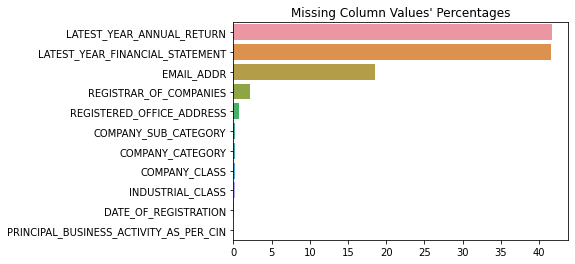

In [ ]:
sns.barplot(y=missing_percentages[missing_percentages!=0].index,x=missing_percentages[missing_percentages!=0])
plt.title("Missing Column Values' Percentages" );

As 41% of the Latest Year Annual Return & Latest Year Financial Statement values are missing which is more than 30%. Therefore, we will drop these two columns and the column containing email address to make aur analyses better.

In [ ]:
df=df.drop(['EMAIL_ADDR','LATEST_YEAR_ANNUAL_RETURN','LATEST_YEAR_FINANCIAL_STATEMENT'],axis=1)

Check whether all the values are unique or is there any duplicate value so that we can make decision to deal with duplicate values. To check total number of duplicate rows use `df.dupicated().sum()`.

In [ ]:
df.duplicated().sum()

0

As there is no duplicate rows we can proceed further to analyze the data.

## Exploratory Analysis and Visualization




In [ ]:
df.columns

Index(['CORPORATE_IDENTIFICATION_NUMBER', 'COMPANY_NAME', 'COMPANY_STATUS',
       'COMPANY_CLASS', 'COMPANY_CATEGORY', 'COMPANY_SUB_CATEGORY',
       'DATE_OF_REGISTRATION', 'REGISTERED_STATE', 'AUTHORIZED_CAP',
       'PAIDUP_CAPITAL', 'INDUSTRIAL_CLASS',
       'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'REGISTERED_OFFICE_ADDRESS',
       'REGISTRAR_OF_COMPANIES'],
      dtype='object')

These are the remaining columns after removing some columns from the original dataset.

   Columns we'll analyze
1. Company_Status
2. Company_Class
3. Company_Category 
4. Company_Sub_Category
5. Date_of_Registration
6. Registered_State
7. Authorized_Cap
8. Paidup_Capital
9. Principal_Business_Activity_As_Per_CIN

### 1. COMPANY_STATUS
The `Status` tells the current state of the company. Whether it is active and operating or dormant or it has been struck off and closed. There are 13 such status that a company could be carrying.
* ACTV - Active
* NAEF - Not available for e-filing
* ULQD - Under liquidation
* AMAL - Amalgamated
* STOF - Strike off
* DISD - Dissolved
* CLLD - Converted to LLP and Dissolved
* UPSO - Under process of Striking Off
* CLLP - Converted to LLP
* LIQD - Liquidated
* DRMT - Dormant
* MLIQ - Vanished
* D455 - Dormant under section 455

We are checking percentage of companies with particular status.

In [ ]:
companies_by_status=df.COMPANY_STATUS.value_counts()*100/len(df.COMPANY_STATUS)
companies_by_status

ACTV    59.738928
STOF    34.579679
UPSO     2.080997
AMAL     1.249542
CLLP     0.661339
DISD     0.490370
NAEF     0.466125
ULQD     0.324270
CLLD     0.244658
D455     0.107672
LIQD     0.056270
DRMT     0.000100
MLIQ     0.000050
Name: COMPANY_STATUS, dtype: float64

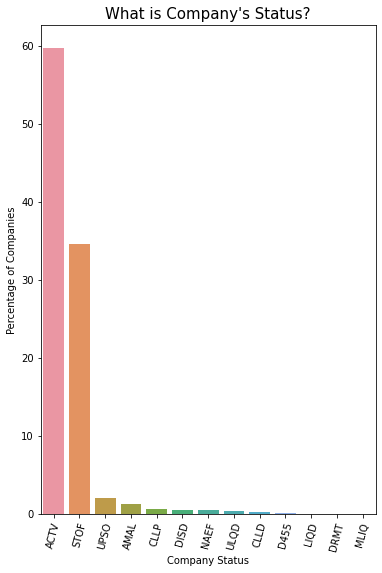

In [ ]:
plt.figure(figsize=(6,9))
plt.title("What is Company's Status?",fontsize=15)
sns.barplot(x=companies_by_status.index,y=companies_by_status)
plt.xticks(rotation=75)
plt.xlabel('Company Status')
plt.ylabel('Percentage of Companies');

`Insight`: Approx 60% of the companies are active as of the year 2020.

### 2. COMPANY_CLASS
Companies are primarily classified into private and public. Private companies or private limited companies are those companies that are closely-held and have less than 200 shareholders. Public companies are limited companies that have more than 200 shareholders and are listed on a stock exchange.

* Public
* Private
* Private (One Person Company)

Let's check number of number with particular class.

In [ ]:
companies_by_class=df.COMPANY_CLASS.value_counts()
companies_by_class

Private                        1819264
Public                          137612
Private(One Person Company)      30216
Name: COMPANY_CLASS, dtype: int64

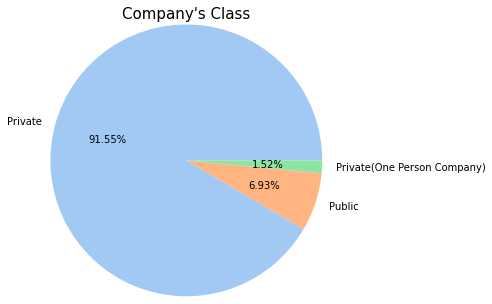

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Company's Class",fontsize=15)

colors = sns.color_palette('pastel')[0:7]
plt.pie(companies_by_class,labels=companies_by_class.index,autopct="%0.2f%%",radius=1.25,colors=colors);

`Insight`: Approx 92% of the companies are Private.

### 3. COMPANY_CATEGORY
These are categories of the company.
* Company limited by Shares
* Company Limited by Guarantee
* Unlimited Company

Let's check the percentage of companies having particular category.

In [ ]:
companies_by_category=df.COMPANY_CATEGORY.value_counts()*100/len(df.COMPANY_CATEGORY)
companies_by_category

Company limited by Shares       98.580894
Company Limited by Guarantee     1.115316
Unlimited Company                0.048540
Name: COMPANY_CATEGORY, dtype: float64

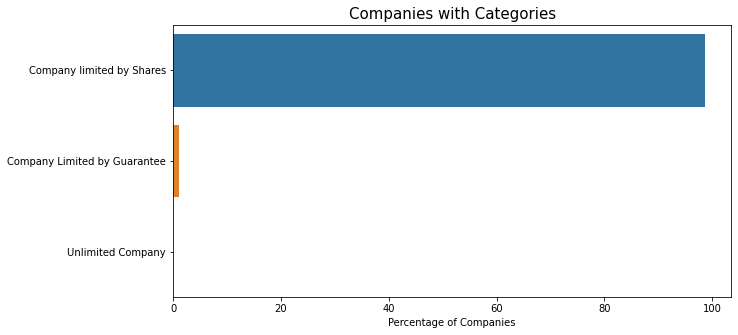

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Companies with Categories',fontsize=15)
sns.barplot(y=companies_by_category.index,x=companies_by_category)
plt.xlabel('Percentage of Companies')
plt.show();

`Insights`: 
* Approx 96% of the companies are limited by Shares.
* Approx very less than 1% of companies are unlimited company. 
* Nearly 2% of the companies hold position in limited by Guarantee.

### 4. COMPANY_SUB_CATEGORY
The sub-category of the company:
* Non-govt company
* State Govt company
* Subsidiary of Foreign Company
* Guarantee and Association comp
* Union Govt company

Let's check the percentage of companies with particular sub-category.

In [ ]:
companies_by_sub_category=df.COMPANY_SUB_CATEGORY.value_counts()*100/len(df.COMPANY_SUB_CATEGORY)
companies_by_sub_category

Non-govt company                  98.879011
Subsidiary of Foreign Company      0.620881
Guarantee and Association comp     0.119719
State Govt company                 0.095976
Union Govt company                 0.028913
Name: COMPANY_SUB_CATEGORY, dtype: float64

`Insight`:
Approx 99% of the companies are Non-Government.

### 5. DATE_OF_REGISTRATION
First, we will check Date of Registration's datatype. It should be datetime if it is not we have to convert it into datetime datatype to get useful insights from the data.

In [ ]:
df.dtypes['DATE_OF_REGISTRATION']

dtype('O')

Hence, the datatype of Date of Registration is object. 

Let's convert it into datetime. Then will check number of registrations yearwise.

In [ ]:
df['DATE_OF_REGISTRATION']=pd.to_datetime(df['DATE_OF_REGISTRATION'],format="%d-%m-%Y",errors='coerce')
registration_year=df['DATE_OF_REGISTRATION'].dt.year.value_counts()
registration_year

2019.0    128658
2018.0    117924
2017.0    107635
2012.0    103271
2011.0     97664
           ...  
1884.0         2
1892.0         2
1877.0         1
1887.0         1
1857.0         1
Name: DATE_OF_REGISTRATION, Length: 151, dtype: int64

In [ ]:
import plotly.express as px
fig=px.bar(x=registration_year.index,y=registration_year)
fig.update_layout(xaxis_title='Registration Year',
                  yaxis_title='Number of Companies',
                  title='Registration Year vs Number of Companies'
                  )
fig.update_traces(hovertemplate='Registration Year: %{x} <br>Number of Companies: %{y}')
fig.show()

To check number of registration according to days. We will use `dt.day_name()` function then convert the series into dataframe then change the datatype of the day column to categorical.

In [ ]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [ ]:
registration_weekday=df['DATE_OF_REGISTRATION'].dt.day_name().value_counts()
registration_weekday_df=registration_weekday.to_frame().reset_index().rename(columns={'index':'day'})
registration_weekday_df.day=pd.Categorical(registration_weekday_df.day,categories=days,ordered=True)

In [ ]:
registration_weekday_df=registration_weekday_df.sort_values(by='day')

In [ ]:
fig=px.line(x=registration_weekday_df.day,y=registration_weekday_df.DATE_OF_REGISTRATION)
fig.update_layout(xaxis_title='Registration Day',yaxis_title='# of Registration')
fig.update_traces(hovertemplate='Registration Day: %{x} <br>Number of Companies: %{y}')
fig

`Insights`:
* On an average, most of companies registered between 2000 & 2019.
* The highest number of companies(128.658 k) registered in 2019.Then there is drastically decrease in number of companies registration.In March 2020, government announced the lockdown due to covid-19. This could be the reason for decrease in companies registration.
* Almost all days have similar number of companies registration except weekends. Saturday and Sunday has very less number of registration, may be due to weekends as people like to relax, spend time with family and stay away from their professional life. One of the reason could be closing of offices on weekends.

### 6.REGISTERED_STATE
State in which company was registered.
Let's first check unique number of states.

In [ ]:
df.REGISTERED_STATE.nunique()

36

In [ ]:
companies_by_state=df.REGISTERED_STATE.value_counts()
companies_by_state

Maharashtra                    395282
Delhi                          348230
West Bengal                    207005
Tamil Nadu                     150871
Karnataka                      125779
Uttar Pradesh                  116337
Telangana                      112401
Gujarat                        105554
Rajasthan                       61370
Kerala                          56098
Haryana                         51039
Madhya Pradesh                  41318
Bihar                           35920
Andhra Pradesh                  33050
Punjab                          32440
Orissa                          27023
Jharkhand                       15078
Chandigarh                      15018
Assam                           12078
Chattisgarh                     10703
Goa                              8942
Uttaranchal                      8924
Himachal Pradesh                 6591
Jammu and Kashmir                5978
Pondicherry                      3454
Meghalaya                        1115
Manipur     

`Insights`:
* Maharashtra is the leading state having highest number of companies registration (395282).
* Sikkim has the lowest number of companies registration (2).

### 7. AUTHORIZED_CAP
Authorized capital of a company is the maximum amount of share capital that the company is authorised by its constitutional documents to issue to shareholders.

In [ ]:
df.AUTHORIZED_CAP.apply(lambda x: '%.f' % x).min()

'0'

In [ ]:
df.AUTHORIZED_CAP.apply(lambda x: '%.f' % x).max()

'999999999990'

`Insights`:
* Rs. 0 is the minimum authorized capital.
* Approx Rs. 999 trilion is the maximum authorized capital.

### 8. PAIDUP_CAPITAL
Paidup capital is the amount of money a company has received from shareholders in exchange for shares of stock.

In [ ]:
companies_by_paidup_capital=df.PAIDUP_CAPITAL.value_counts()
companies_by_paidup_capital

100000.0       873908
0.0            161788
500000.0        87155
1000000.0       63100
200000.0        49811
                ...  
9424820.0           1
1350400.0           1
150800178.0         1
9425200.0           1
529020.0            1
Name: PAIDUP_CAPITAL, Length: 144245, dtype: int64

`Insight`:
* Most of the companies (873908) have Rs. 1 lakh Paidup capital.

### 9. PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN
This is Principal Business Activity of the company as per Corporate Identity Number.

In [ ]:
companies_business_activity=df.PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN.value_counts().sort_values(ascending=False)
companies_business_activity

Real estate renting and business activities                                                                       679955
Manufacturing                                                                                                     410402
Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods                  227333
Construction                                                                                                      162125
Financial intermediation                                                                                          120714
Agriculture & allied                                                                                               82572
Transport storage and communications                                                                               63738
Other community social and personal service activities                                                             59282
Extraterritorial organizations a

`Insight`:
* Most of the registered companies has the Real estate renting and business activities as the principal business.
* Least number of registered companies has their prinicipal business is Activities of private households as employers and undifferentiated production activities of private households.

## Ask & Answer Questions


#### 1. Which 5 states have the highest number of companies registered?

To answer this question, first we will generate a dataframe.

In [ ]:
companies_by_state_df=companies_by_state.to_frame().reset_index().rename(columns={'index':'State','REGISTERED_STATE':'No. of Companies Registered'})

These are some states and union territories whose names has updated. So, let's replace these names with old names from the dataframe.

In [ ]:
updated_states = {"Jammu and Kashmir":"Jammu & Kashmir",
    "Orissa" : "Odisha",
                "Chattisgarh": "Chhattisgarh",
                "Dadra and Nagra Haveli": "Dadra and Nagar Haveli and Daman and Diu",
                "Pondicherry": "Puducherry",
                "Uttaranchal": "Uttarakhand"}

companies_by_state_df.State = companies_by_state_df.State.replace(updated_states)


As now Dadra and Nagar Haveli, and Daman and Diu has merged. Let's first find number of companies for both the territories separately.

In [ ]:
dadra_nagar_companies=companies_by_state_df.loc[companies_by_state_df['State']=='Dadra and Nagar Haveli and Daman and Diu']['No. of Companies Registered']
daman_companies=companies_by_state_df.loc[companies_by_state_df['State']=='Daman and Diu']['No. of Companies Registered']

Let's combine both the territories and make it one.

In [ ]:
companies_by_state_df.loc[companies_by_state_df['State']=='Dadra and Nagar Haveli and Daman and Diu','No. of Companies Registered']=int(dadra_nagar_companies)+int(daman_companies)

In [ ]:
companies_by_state_df

,State,No. of Companies Registered
0,Maharashtra,395282
1,Delhi,348230
2,West Bengal,207005
3,Tamil Nadu,150871
4,Karnataka,125779
5,Uttar Pradesh,116337
6,Telangana,112401
7,Gujarat,105554
8,Rajasthan,61370
9,Kerala,56098


Now, let's drop the old row for Daman and Diu.

In [ ]:
companies_by_state_df=companies_by_state_df.drop(32)

As, Ladakh is the new territory. Let's update it in the dataframe.

In [ ]:
companies_by_state_df.loc[len(companies_by_state_df.index)]=['Ladakh',0]

In [ ]:
countries_geojson='https://gist.githubusercontent.com/sanuann/c4acae43dead7f21976c4fe2ef4dcceb/raw/c4a3d776a05a3f49ce05747f38c86ff4cd011ee0/states-in-india.geojson'

We will use Choropleth_mapbox chart from Plotly library. To have the idea about this chart [check](https://plotly.com/python/mapbox-county-choropleth/) this. 

In [ ]:
fig = px.choropleth_mapbox(companies_by_state_df, geojson=countries_geojson, 
                                           locations='State', color='No. of Companies Registered',
                                           color_continuous_scale="Viridis",
                                           featureidkey="properties.ST_NM",zoom=3.4,
                                           center = {"lat": 23.473324, "lon": 78.9629},
                           mapbox_style="carto-positron", opacity=0.9,
                           title="Statewise No. of Companies Registered")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Hence, Maharashtra has the highest number of companies registered (395.282k) followed by Delhi (348.230k), West Bengal (207.007k), Tamil Nadu (150.871k), Karnataka (125.779k).

#### 2. Which are the top 5 registered principal business activities?

First, we will convert companies_business_activity series to dataframe and change the column names.

In [ ]:
companies_business_activity_df=companies_business_activity.to_frame().reset_index().rename(columns={'index':'Business_Activity','PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN':'No. of Companies'})

Let's visualize the data using pie chart from Plotly library. To intract more with the chart hover over the chart.

In [ ]:
fig=px.pie(companies_business_activity_df,names = 'Business_Activity',values = 'No. of Companies',
           color_discrete_sequence=px.colors.sequential.Plasma,hole=0.4,title='Principal Business Activity (Hover over the chart to get more information)'
       )
fig.update_traces(textposition='inside')
fig.update_layout(showlegend=False)
fig

Hence, it is clear from the above chart that 34.1% is highest percentage.
The top principal business activity is Real estate renting and business activities (679,955) followed by Manufacturing (410,402), Wholesale and retail trade repair of motor vechicles motorcycles and personal household goods (227,333), Construction (162,125), Fincancial intermediation (120,714).

#### 3. What is the trend of companies registered as per principal business activity year over year?

To answer this question, we are going to seaborn library and its histogram plot.

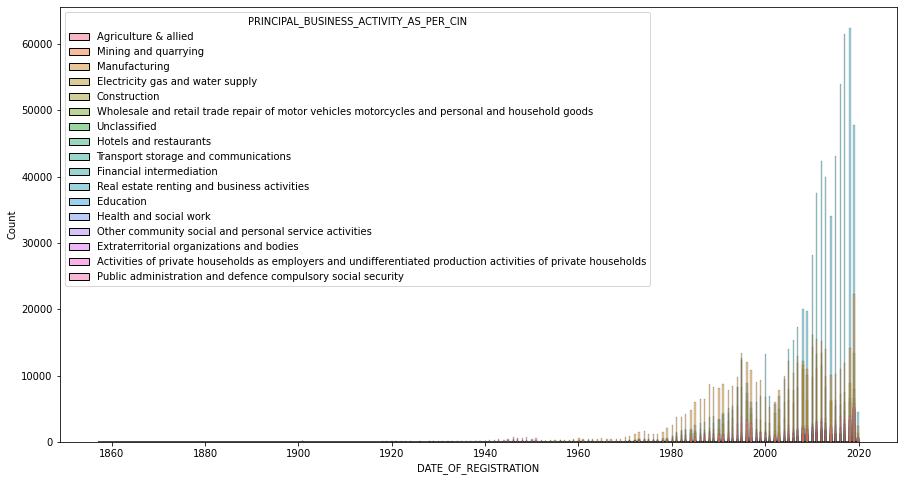

In [ ]:
plt.figure(figsize=(15,8))

sns.histplot(data=df,x=df.DATE_OF_REGISTRATION.dt.year,hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')
plt.show()

There is almost exponential trend in the number of registration. It is clearly visible from the chart that the number of registraion is drastically increasing for Education sector between 2000 to 2019.

`Insights`:
* There is drastic decrease in number of companies registration from 2019 to 2020 but the number of companies registration is higher in Education sector. As the demand for online classes had increased due to covid-19, this could be the reason for the same. 

#### 4. What is the status of most of the companies currently (2020) having highest paidup capital? Which are the top 5 states having highest number of active companies? 

Let's first add one more column in the data with the name `COUNTRY` to make our sunburst map more clear and effective.

In [ ]:
df['COUNTRY']='India'

In [ ]:
new_df=df.copy()

Let's create a dictionary to map company status's codes with company's status.

In [ ]:
status_description={
    'ACTV':'Active',
    'NAEF':'Not available for e-filing',
    'ULQD':'Under liquidation',
'AMAL':'Amalgamated',
'STOF':'Strike off',
'DISD':'Dissolved',
'CLLD':'Converted to LLP and Dissolved',
'UPSO':'Under process of Striking Off',
'CLLP':'Converted to LLP',
'LIQD':'Liquidated',
'DRMT':'Dormant',
'MLIQ':'Vanished',
'D455':'Dormant under section 455'
}

In [ ]:
new_df.COMPANY_STATUS=new_df.COMPANY_STATUS.replace(status_description)

To get more visualization, we will use sunburst chart. Hover over the chart to get information from the chart. Click on any status to get more insights and then do click on it to get original visualization. 

In [ ]:
fig=px.sunburst(new_df,
            path=['COUNTRY','COMPANY_STATUS','REGISTERED_STATE'],
            values='PAIDUP_CAPITAL', 
            color_discrete_sequence=px.colors.sequential.Plasma
            )
fig

Hence, most of the companies are active according to highest paidup capital. The top states having highest number of active companies acccording to highest paidup capital are Maharashtra, Gujarat, Delhi, Tamil Nadu, Karnataka. 

`Insight`:
* By clicking on the strike-off status, it is clear that most of the companies from West Bengal have been striked off. This could be the reason of West Bengal doesn't hold position in top 5 states having highest number of active companies while it hold position in top 5 states having highest registration of companies.

#### 5. Are the most companies Private or Public having highest paidup capital? Which are the top 5 states having Public companies? Which are the top 5 states having Private companies? 

We will answer this question using treemap. But to visualize this the data shouldn't have missing values. So, to handle this we will fill missing values with 'NA'.

In [ ]:
df=df.fillna('NA')

In [ ]:
fig=px.treemap(df,
            path=['COUNTRY','COMPANY_CLASS','REGISTERED_STATE'],
            values='PAIDUP_CAPITAL',
            color_discrete_sequence=px.colors.sequential.Plasma
            )
fig

Most of the companies are Public with highest paidup capital.

Maharashtra, Gujarat, Delhi, Uttar Pradesh, Tamil Nadu are the top 5 states having highest number of Public companies with highest paidup capital.

Maharashtra, Delhi, Gujarat, Tamil Nadu, Karnataka are the top 5 states having highest number of Private companies with highest paidup capital.

#### 6. Which are the top 5 companies according to authorized cap? Are the same companies among top 5 according to paidup capital also?

To answer this question first we will make two different dataframes with 5 top companies with highest authorized cap and paidup capital respectively. Then, will visualize this.

In [ ]:
new_df1=df[['COMPANY_NAME','PAIDUP_CAPITAL']].sort_values(by='PAIDUP_CAPITAL',ascending=False).head(5)
new_df2=df[['COMPANY_NAME','AUTHORIZED_CAP']].sort_values(by='AUTHORIZED_CAP',ascending=False).head(5)

In [ ]:
fig=px.bar(new_df2,y='COMPANY_NAME',x='AUTHORIZED_CAP',color_discrete_sequence=px.colors.sequential.Plasma
           ,title='Company With Authorized Cap')
fig

In [ ]:
px.bar(new_df1,y='COMPANY_NAME',x='PAIDUP_CAPITAL',color_discrete_sequence=px.colors.sequential.Plasma,
       title='Company with Paidup Capital')

Therefore, Jio Platforms Limited is the company having highest authorized cap followed by Reliance Jio infocomm Limited, U.P. Power Corporation Limited, Tata Teleservices Limited, MSEB Company Holding Limited. Not all these 5 companies among top 5 companies having higest paidup capital except Jio Platforms Limited, Reliance Jio infocomm Limited, U.P. Power Corporation Limited and MSEB Company Holding Limited.

#### 7. Is there any trend monthwise registration? Which month has the highest number of registration and which month has the lowest number of registration? What can be the reason of the highest registration for the month?

To answer this question, first we will find out number of companies registered monthly by using `dt.month_name().value_counts()` function from Pandas library. Then we will arrange according to month then will visulize it to get more insights. 

In [ ]:
months=['January','February','March','April','May','June','July','August','September','October','November','December']

In [ ]:
from calendar import month_name
registration_month=df['DATE_OF_REGISTRATION'].dt.month_name().value_counts()
registration_month_df=registration_month.to_frame().reset_index().rename(columns={'index':'name'})
registration_month_df.name=pd.Categorical(registration_month_df.name,categories=months,ordered=True)

In [ ]:
registration_month_df=registration_month_df.sort_values(by='name')

In [ ]:
fig=px.line(x=registration_month_df.name,y=registration_month_df.DATE_OF_REGISTRATION)
fig.update_layout(xaxis_title='Month',yaxis_title='Number of Companies Registered')
fig.update_traces(hovertemplate='Registration Month: %{x} <br>No. of Companies: %{y}')
fig

There is no particular trend in monthwise registration. March has the highest number of companies registration while November has the least number of companies registration. March is the last month of the financial year this could be the reason of highest registration in March.

#### 8. What are the top 5 business activities in Meghalaya?

In [ ]:
companies_business_activity_meghalaya=df[df.REGISTERED_STATE=='Meghalaya'].PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN.value_counts()
companies_business_activity_meghalaya_df=companies_business_activity_meghalaya.to_frame().reset_index().rename(columns={'index':'Business Activity','PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN':'No. of Companies'})

In [ ]:
fig=px.pie(companies_business_activity_meghalaya_df,names='Business Activity',values='No. of Companies',
       color_discrete_sequence=px.colors.sequential.Plasma,hole=0.4,title='Business Activities in Meghalaya (Hover the chart to get more information)')
fig.update_layout(showlegend=False)
fig.update_traces(textposition='inside')
fig

The top principal business activity in Meghalaya is Manufacturing (411) followed by Real estate renting and business activities (149), Mining and quarrying (110), Wholesale and retail trade repair of motor vechicles motorcycles and personal household goods (100), Construction (58).

`Insight`:
* For Meghalaya, Mininig and quarrying hold position in top 5 business activities while the overall companies registration Mining and quarrying doesn't hold position in top 5 principal business activities, not in top 10 also.

## Summary and Conclusion
1. Uttar Pradesh has the highest population in India but doesn't hold position in top 5 states having highest number of companies registered.
2. Approx 60% of the companies are active as of the year 2020.
3. Maharastra is the leading state in terms of having highest number of registered companies as well as highest number of active companies with high paidup capital.
4. Real estate and rental business activities is the growing industry.
5. There is drastic decrease in number of companies registration from 2019 to 2020 but the number of companies registration is higher in Education sector. As the demand for online classes had increased due to covid-19, this could be the reason for the same.
6. Approx 92% of the companies are Private.
7. The highest number of companies(128.658 k) registered in 2019.Then there is drastically decrease in number of companies registration. In March 2020, government announced the lockdown due to covid-19. This could be reason for decrease in companies registration.
8. West Bengal doesn't hold position in top 5 states having highest number of active companies while it hold position in top 5 states having highest registration of companies.
9. For Meghalaya, Mininig and quarrying hold position in top 5 business activities while the overall companies registration Mining and quarrying doesn't hold position in top 5 principal business activities, not in top 10 also.


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/singhalkshama4343/exploratory-data-analysis-project


'https://jovian.ai/singhalkshama4343/exploratory-data-analysis-project'

## Future Work Ideas
We can answer the following questions:
- What are the top 5 business activities in Mumbai?
- What is the status of most of the companies currently (2020) having highest authorized cap? Which are the top 5 states having highest number of active companies? 
- What is the average paid up capital by the companies?

We can combine this data with different datasets having information like total revenue, profit, loss and other information about the company to get more insights.

## References:

* Tutorial for Pandas available at https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/analyzing-tabular-data-with-pandas
* Tutorial for Matplotlib and Seaborn available at https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/visualization-with-matplotlib-and-seaborn
* Tutorial for Plotly available at https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/interactive-visualization-with-plotly-and-folium
* Build an Exploratory Data Analysis Project from Scratch with Python, Numpy, and Pandas available at https://www.youtube.com/watch?v=kLDTbavcmd0&t=7401s
* To change the hover data in Plotly available at
https://plotly.com/python/hover-text-and-formatting/

* Choropleth Map in Plotly available at https://plotly.com/python/mapbox-county-choropleth/

In [3]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/singhalkshama4343/exploratory-data-analysis-project


'https://jovian.ai/singhalkshama4343/exploratory-data-analysis-project'